In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# Load the data from the CSV file
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [38]:
# Handling missing values in the 'bmi' column
data['bmi'].fillna(data['bmi'].mean(), inplace=True)


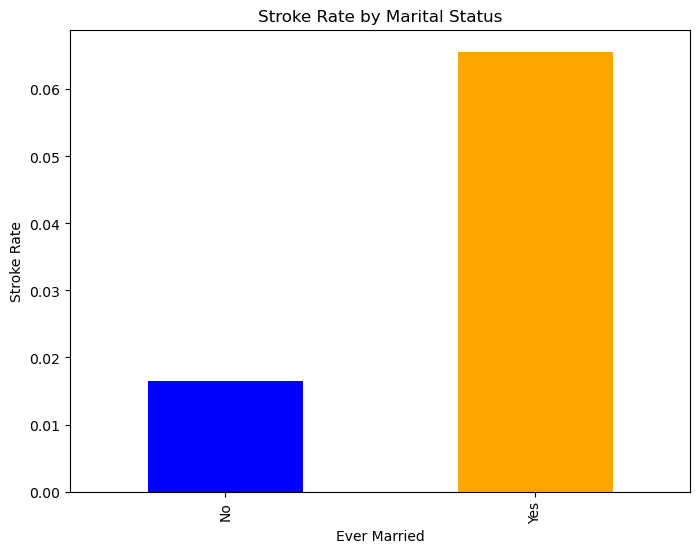

In [39]:
# Visualizing the 'ever_married' column's effect on stroke rate
plt.figure(figsize=(8, 6))
grouped = data.groupby("ever_married")["stroke"].mean()
grouped.plot(kind="bar", color=["blue", "orange"])
plt.xlabel("Ever Married")
plt.ylabel("Stroke Rate")
plt.title("Stroke Rate by Marital Status")
plt.show()

In [42]:
# Counting and visualizing smoking statuses
unknown_count = (data['smoking_status'] == 'Unknown').sum()
temp1 = (data['smoking_status'] == 'smokes').sum()
temp2 = (data['smoking_status'] == 'never smoked').sum()
temp3 = (data['smoking_status'] == 'formerly smoked').sum()

In [43]:
# Encoding categorical data
data = data[data['gender'] != 'Other']
data['ever_married'] = data['ever_married'].replace({'Yes': 1, 'No': 0})
data["gender"] = data["gender"].replace({'Male': 1, 'Female': 0})
data["work_type"] = data["work_type"].replace({'children': 0, 'Private': 1, 'Govt_job': 1,
                                               'Self-employed': 2, 'Never_worked': 3})
data["smoking_status"] = data["smoking_status"].replace({'Unknown': 0, 'never smoked': 0,
                                                         'formerly smoked': 1, 'smokes': 2})

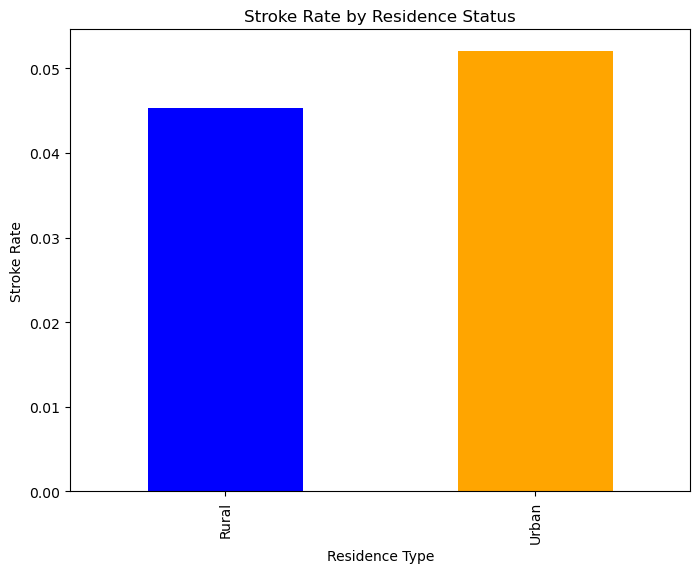

In [44]:
# Visualizing the Residence Type column
plt.figure(figsize=(8, 6))
grouped = data.groupby("Residence_type")["stroke"].mean()
grouped.plot(kind="bar", color=["blue", "orange"])
plt.xlabel("Residence Type")
plt.ylabel("Stroke Rate")
plt.title("Stroke Rate by Residence Status")
plt.show()

In [45]:

# Drop unnecessary columns
data = data.drop(columns="Residence_type")
data = data.drop(columns='id')

In [46]:
# Describe the data
data_description = data.describe()


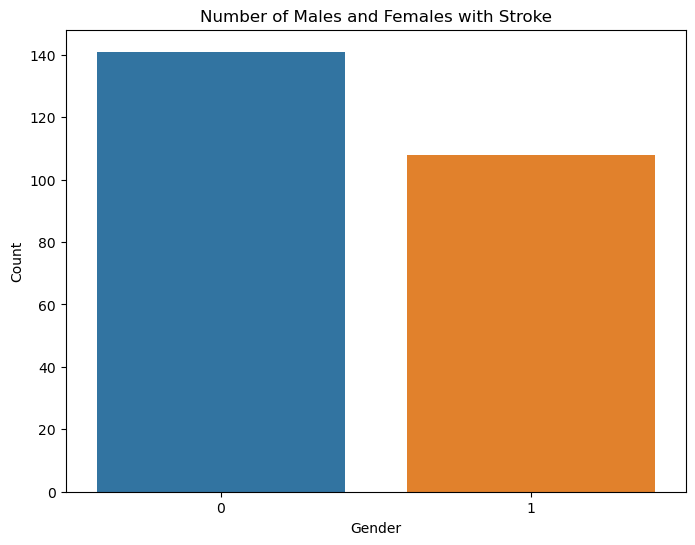

In [47]:
# Visualize stroke count by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data[data['stroke'] == 1])
plt.title('Number of Males and Females with Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

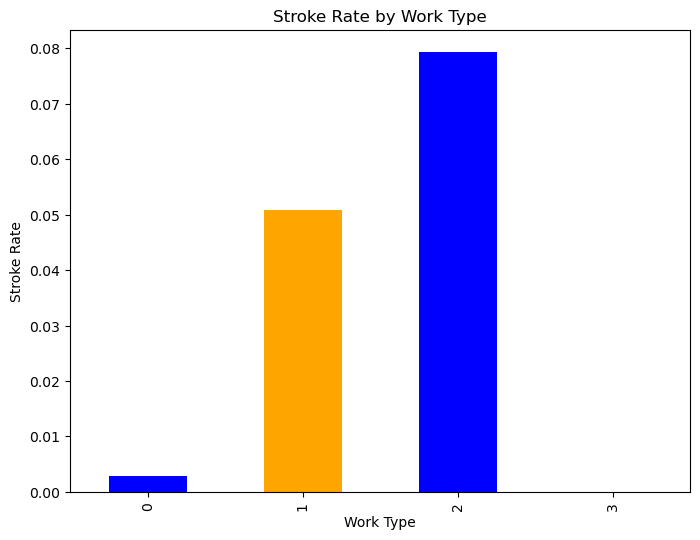

In [48]:

# Visualizing stroke rate by work type
plt.figure(figsize=(8, 6))
grouped = data.groupby("work_type")["stroke"].mean()
grouped.plot(kind="bar", color=["blue", "orange"])
plt.xlabel("Work Type")
plt.ylabel("Stroke Rate")
plt.title("Stroke Rate by Work Type")
plt.show()

In [49]:
# Prepare data for modeling
scaled_data = data.drop(['stroke', 'gender'], axis=1)
y = data['stroke']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.25, random_state=41)

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [50]:

# Apply logistic regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

plt.show()

In [52]:
# Apply K-nearest neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_preds = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_preds)


In [54]:
# Display results
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Confusion Matrix for Logistic Regression:")
print(cm)
print("Classification Report for Logistic Regression:")
print(cr)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.2f}")


Logistic Regression Accuracy: 1.00
Confusion Matrix for Logistic Regression:
[[1209    0]
 [   0   69]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1209
           1       1.00      1.00      1.00        69

    accuracy                           1.00      1278
   macro avg       1.00      1.00      1.00      1278
weighted avg       1.00      1.00      1.00      1278

K-Nearest Neighbors Accuracy: 1.00


Conclusion:
In this code, we've conducted exploratory data analysis (EDA) on a healthcare dataset related to stroke risk prediction. We've handled missing values, visualized the impact of different factors (marital status, smoking status, residence type, gender, work type) on stroke rates, and encoded categorical variables. After preparing the data, we applied logistic regression and K-nearest neighbors (KNN) classification models to predict stroke risk. The results are printed at the end, including accuracy scores, confusion matrices, and classification reports for both models. These steps provide insight into the data and demonstrate the application of machine learning techniques for stroke prediction.